# ZADÁNÍ 1

Uvažuj, že zpracováváš analýzu pro softwarovou firmu. Firma má kanceláře v Praze, Plzni a Liberci. 
Seznam zaměstnanců pro jednotlivé kanceláře najdeš v souborech zam_praha.csv, zam_plzeň.csv a zam_liberec.csv.

- Načti data o zaměstnancích z CSV souborů do tabulek (DataFrame). Ke každé tabulce přidej nový sloupec mesto, které bude obsahovat informaci o tom, ve kterém městě zaměstnanec pracuje.

- Vytvoř novou tabulku zamestnanci a ulož do ní informace o všech zaměstnancích (operace concat).

- Ze souboru platy_2021_02.csv načti platy zaměstnanců za únor 2021. Propoj tabulku (operace join) s platy a tabulku se zaměstnanci pomocí sloupce cislo_zamestnance.

- Porovnej rozměry tabulek před spojením a po spojení. Pokud nemá některý zaměstnanec plat za únor, znamená to, že v naší firmě již nepracuje.

- Spočti průměrný plat zaměstnanců v jednotlivých kancelářích.

In [ ]:
import pandas
import matplotlib.pyplot

In [ ]:
prague = pandas.read_csv("zam_praha.csv")
pilsen = pandas.read_csv("zam_plzeň.csv")
liberec = pandas.read_csv("zam_liberec.csv")
prague["city"] = "prague"
pilsen["city"] = "pilsen"
liberec["city"] = "liberec"

In [ ]:
employees = pandas.concat([prague, pilsen, liberec], ignore_index=True)
employees

In [ ]:
february = pandas.read_csv("platy_2021_02.csv")
staff_salaries = pandas.merge(february, employees, on=["cislo_zamestnance"]) # V tabulce jsou pouze zaměstnanci, kteří ve firmě pracují
staff_salaries

In [ ]:
employees.shape
# february.shape
# staff_salaries.shape

In [ ]:
# Pokud chceme vidět, kteří zaměstnancijiž ve firmě nepracují, musíme použít následující kód
staff = pandas.merge(february, employees, on=["cislo_zamestnance"], how="right")
staff

In [ ]:
staff_salaries.groupby("city")["plat"].mean()

# ZADÁNÍ 2

Pokračuj ve své práci pro softwarovou firmu. Ze souboru vykazy.csv načti informace o výkazech na projekty pro jednoho vybraného zákazníka.

- Načti data ze souboru a ulož je do tabulky.
- Proveď agregaci a zjisti celkový počet vykázaných hodin za jednotlivé projekty.

In [ ]:
reports = pandas.read_csv("vykazy.csv")
reports

In [ ]:
statements = reports.groupby("project")["hours"].sum()
statements
# statements.sort_values(ascending=False).plot(kind='barh', color='grey', grid=True, title="Počet vyk. hodin za projekty", sort_columns=False)

# BONUS 1

- Ulož do proměnné počet zaměstnanců, kteří v naší firmě již nepracují.
- V rámci úspory se IT oddělení rozhodlo prověřit licence přidělené zaměstnancům, kteří ve firmě již nepracují. Vytvoř samostatnou tabulku, která obsahuje jména zaměstnanců, kteří ve firmě již nepracují. Tabulku ulož do souboru CSV.

In [ ]:
unemployed_workers = staff_salaries[staff_salaries["plat"].isnull()]
unemployed_workers.shape

In [ ]:
unemployed_workers.to_csv("unemployed.csv", index=False)

# BONUS 2

Propoj tabulku s výkazy s tabulkou se zaměstnanci, kterou jsi vytvořil(a) v předchozím cvičení.

Následně proveď statistiku vykázaných hodin za jednotlivé kanceláře, tj. spočítej celkový počet hodin vykázaný zaměstnanci jednotlivých kanceláří na projekty daného zákazníka.

In [ ]:
statements_employees = pandas.merge(employees, reports, left_on="cislo_zamestnance", right_on="emloyee_id")
statements_employees

<Axes: ylabel='project,city'>

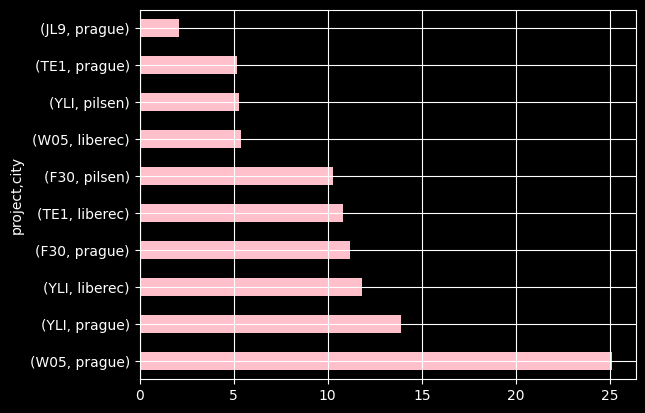

In [237]:
office_hours = statements_employees.groupby(["project", "city"])["hours"].sum()
# office_hours
office_hours.sort_values(ascending=False).plot(kind="barh", color="pink", grid=True)